In [47]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

path = '//home//khalid//pythonfiles//classExo1.txt'
studentData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

print('Data = \n', studentData.head(10))
print('\nData describe = \n', studentData.describe())

Data = 
       Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1

Data describe = 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [48]:
#Functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    #first term of the equation
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    #second term
    second = np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    
    return np.sum(first-second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        #print('grad[',i,']\n', grad[i])
        
    return grad

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x>=0.5 else 0 for x in probability]

In [49]:
# separate admitted student from who non
positive = studentData[studentData['Admitted'].isin([1])]
negative = studentData[studentData['Admitted'].isin([0])]

print('Students who are admitted:\n', positive.head(5))
print("\nstudents who are not admitted:\n", negative.head(5))


Students who are admitted:
       Exam 1     Exam 2  Admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1

students who are not admitted:
        Exam 1     Exam 2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0


Text(0, 0.5, 'Exam 2 score')

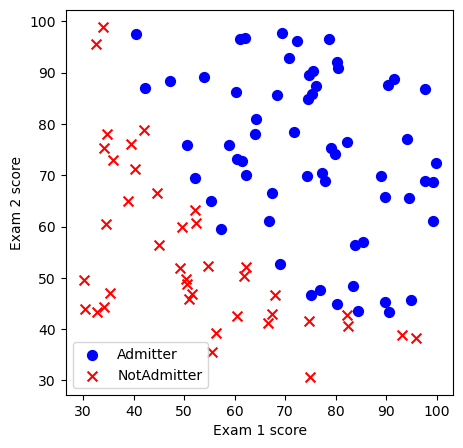

In [50]:
#draw points
#students who admitted are in blue points
#students who are not admitted are in red points

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitter')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='NotAdmitter')

ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

Text(0.5, 0, 'Sigmoid Function')

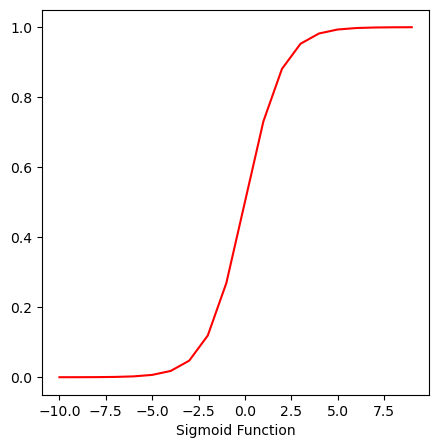

In [51]:
#print the Sigmoid Function

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums),'r')
ax.set_xlabel('Sigmoid Function')

In [52]:
studentData.insert(0, 'Ones', 1)
print(studentData.head(5))

   Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1


In [53]:
#separet training data X from target variable y

cols = studentData.shape[1]
X = studentData.iloc[:,0:cols-1]
y = studentData.iloc[:,cols-1:cols]

#convert to numpy array
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [54]:
#cost function before optimation
cost_before_opt = cost(theta, X, y)
print('the Cost function before optimation is: ', cost_before_opt)

the Cost function before optimation is:  0.6931471805599453


In [55]:
#finding the best value of theta 
#then store in at result
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args = (X, y))
print('Best values of theta is: ', result)

Best values of theta is:  (array([-25.16131864,   0.20623159,   0.20147149]), 36, 0)


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631537E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271776E-01   8.07191978E-06
   12   26  2.035251112915609E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926863E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898612E-01   1.94830211E-05
   17   36  2.034977015894745E-01   2.35797626E-13


In [56]:
#cost function after optimation
cost_after_opt = cost(result[0], X, y)
print('The cost function after optimation is: ', cost_after_opt)

The cost function after optimation is:  0.20349770158947453


In [57]:
#test the module, and let him predict which student will be admitted and which not

theta_min = np.matrix(result[0])

predictions = predict(theta_min, X)

print('New predict = ', predictions)

New predict =  [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


In [58]:
# a in predections, b in y
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

accuracy = (sum(map(int, correct)) % len(correct))

print('The accuracy of the model is = {0}%'.format(accuracy))

The accuracy of the model is = 89%
